# **STUDY ON CART ABANDONMENT**

**INTRODUCTION**

Shopping cart abandonment refers to the phenomenon where customers add items to an online shopping cart, but then leave the site without completing the purchase. This is a common issue faced by e-commerce businesses, as it can result in a significant loss of potential revenue. Studies have shown that the average shopping cart abandonment rate is around 69%, which means that nearly 7 out of 10 customers do not complete their purchases.

**ABOUT DATASET**

Dataset taken here from kaggle consists of **4284 rows and 13 columns**.

Attributes containing in the dataset-

**ID**: The session id of the customer.

**Is_Product_Details_viewed**: Whether the customer is viewing the product details or not.

**Session_Activity_Count**: How many times a customer is going to the different pages.

**No_Items_Added_InCart**: Number of items in cart.

**No_Items_Removed_FromCart**: Number of items removed from the cart.

**No_Cart_Viewed**: How many times the customer is going to the cart page.

**No_Checkout_Confirmed**: How many times the checkout has been confirmed successfully by the customer.

**No_Checkout_Initiated**: How many times the checkout(successful as well as unsuccess) is being done by the user.

**No_Cart_Items_Viewed**: How many times a user is viewing the product from cart.

**No_Customer_Login**: Number of times the customer had did log in.

**No_Page_Viewed**: Number of pages viewed by the customer.

**Customer_Segment_Type**: The customer falls under which category,i.e, 0 for Target Customer, 1 for Loyal Customer, and 2 for Untargeted customer.

**Cart_Abandoned**: Whether the customer is doing cart abandonment or not. This is the target variable that we need to predict.

**IMPORTING LIBRARIES**

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix,accuracy_score,cohen_kappa_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
import pickle

**UNDERSTANDING THE DATA**

In [ ]:
dataset = pd.read_csv('data_cart_abandonment.csv')
dataset.head()

,ID,Is_Product_Details_viewed,Session_Activity_Count,No_Items_Added_InCart,No_Items_Removed_FromCart,No_Cart_Viewed,No_Checkout_Confirmed,No_Checkout_Initiated,No_Cart_Items_Viewed,No_Customer_Login,No_Page_Viewed,Customer_Segment_Type,Cart_Abandoned
0,Session_ID_0,Yes,4,1.0,0,0.0,0,0,1,0,0,0,1
1,Session_ID_1,No,38,0.0,0,2.0,0,0,2,0,2,0,1
2,Session_ID_2,No,8,5.0,0,0.0,1,1,1,0,0,1,0
3,Session_ID_3,No,6,0.0,0,2.0,0,0,4,0,0,0,1
4,Session_ID_4,Yes,31,14.0,12,1.0,0,0,4,0,0,2,1


In [ ]:
dataset.shape

(4284, 13)

In [ ]:
dataset.dtypes

ID                            object
Is_Product_Details_viewed     object
Session_Activity_Count         int64
No_Items_Added_InCart        float64
No_Items_Removed_FromCart      int64
No_Cart_Viewed               float64
No_Checkout_Confirmed          int64
No_Checkout_Initiated          int64
No_Cart_Items_Viewed           int64
No_Customer_Login              int64
No_Page_Viewed                 int64
Customer_Segment_Type          int64
Cart_Abandoned                 int64
dtype: object

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4284 entries, 0 to 4283
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   ID                         4284 non-null   object 
 1   Is_Product_Details_viewed  4284 non-null   object 
 2   Session_Activity_Count     4284 non-null   int64  
 3   No_Items_Added_InCart      4275 non-null   float64
 4   No_Items_Removed_FromCart  4284 non-null   int64  
 5   No_Cart_Viewed             4275 non-null   float64
 6   No_Checkout_Confirmed      4284 non-null   int64  
 7   No_Checkout_Initiated      4284 non-null   int64  
 8   No_Cart_Items_Viewed       4284 non-null   int64  
 9   No_Customer_Login          4284 non-null   int64  
 10  No_Page_Viewed             4284 non-null   int64  
 11  Customer_Segment_Type      4284 non-null   int64  
 12  Cart_Abandoned             4284 non-null   int64  
dtypes: float64(2), int64(9), object(2)
memory usage:

In [ ]:
dataset.describe()

,Session_Activity_Count,No_Items_Added_InCart,No_Items_Removed_FromCart,No_Cart_Viewed,No_Checkout_Confirmed,No_Checkout_Initiated,No_Cart_Items_Viewed,No_Customer_Login,No_Page_Viewed,Customer_Segment_Type,Cart_Abandoned
count,4284.000000,4275.000000,4284.000000,4275.000000,4284.000000,4284.000000,4284.000000,4284.000000,4284.000000,4284.000000,4284.000000
mean,13.878151,3.488421,0.867180,1.444211,0.187208,0.980159,2.295985,0.169234,2.348506,0.563259,0.856209
std,15.934084,6.789401,3.070022,2.082496,0.517691,1.140525,6.052666,0.400299,2.868862,0.703856,0.350918
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,6.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000
50%,10.000000,2.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,2.000000,0.000000,1.000000
75%,17.000000,5.000000,0.000000,2.000000,0.000000,1.000000,2.000000,0.000000,3.000000,1.000000,1.000000
max,436.000000,225.000000,50.000000,34.000000,11.000000,14.000000,256.000000,3.000000,35.000000,2.000000,1.000000


In [ ]:
dataset.Cart_Abandoned=pd.Categorical(dataset.Cart_Abandoned)
dataset.Cart_Abandoned.dtypes

CategoricalDtype(categories=[0, 1], ordered=False)

In [ ]:
dataset.Customer_Segment_Type=pd.Categorical(dataset.Customer_Segment_Type)

In [ ]:
dataset.dtypes

ID                             object
Is_Product_Details_viewed      object
Session_Activity_Count          int64
No_Items_Added_InCart         float64
No_Items_Removed_FromCart       int64
No_Cart_Viewed                float64
No_Checkout_Confirmed           int64
No_Checkout_Initiated           int64
No_Cart_Items_Viewed            int64
No_Customer_Login               int64
No_Page_Viewed                  int64
Customer_Segment_Type        category
Cart_Abandoned               category
dtype: object

**COUNT PLOT OF NUMBER OF ABANDONED CARTS**

<Axes: ylabel='count'>

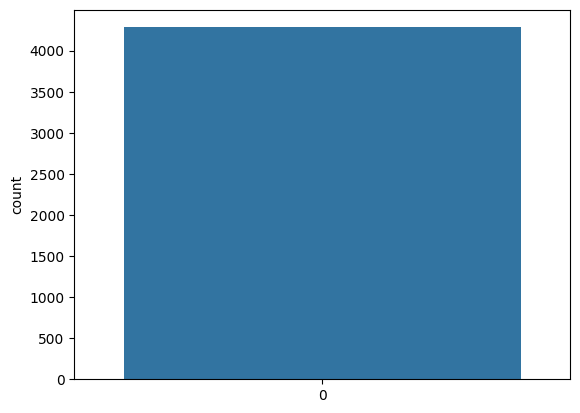

In [ ]:
sns.countplot(dataset.Cart_Abandoned)

**EXPLORATORY DATA ANALYSIS**

In [ ]:
num=dataset.select_dtypes(include=["float64","int64"])
cat=dataset.select_dtypes(include=["object","category"]).drop(["ID"],axis=1)

In [ ]:
num.shape

(4284, 9)

1.FOR NUMERICAL VARIABLES

array([[<Axes: title={'center': 'Session_Activity_Count'}>,
        <Axes: title={'center': 'No_Items_Added_InCart'}>,
        <Axes: title={'center': 'No_Items_Removed_FromCart'}>,
        <Axes: title={'center': 'No_Cart_Viewed'}>,
        <Axes: title={'center': 'No_Checkout_Confirmed'}>],
       [<Axes: title={'center': 'No_Checkout_Initiated '}>,
        <Axes: title={'center': 'No_Cart_Items_Viewed'}>,
        <Axes: title={'center': 'No_Customer_Login'}>,
        <Axes: title={'center': 'No_Page_Viewed'}>, <Axes: >]],
      dtype=object)

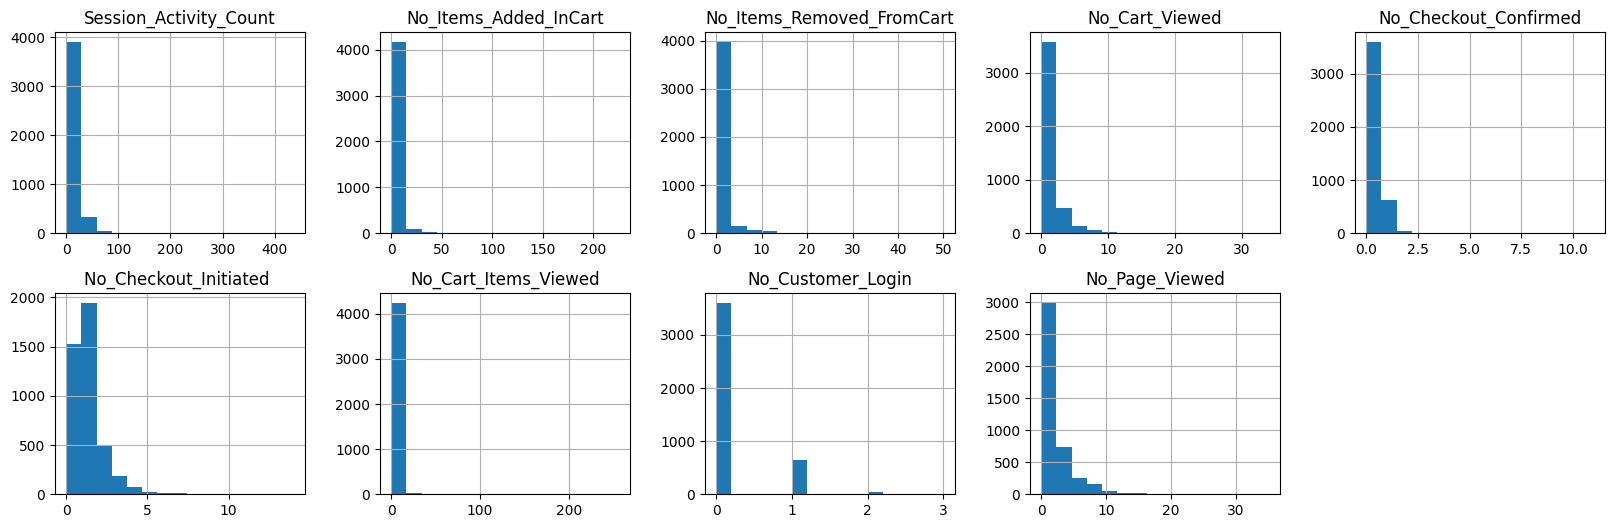

In [ ]:
num.hist(bins=15, figsize=(20, 6), layout=(2, 5))

2.FOR CATEGORICAL VARIABLES

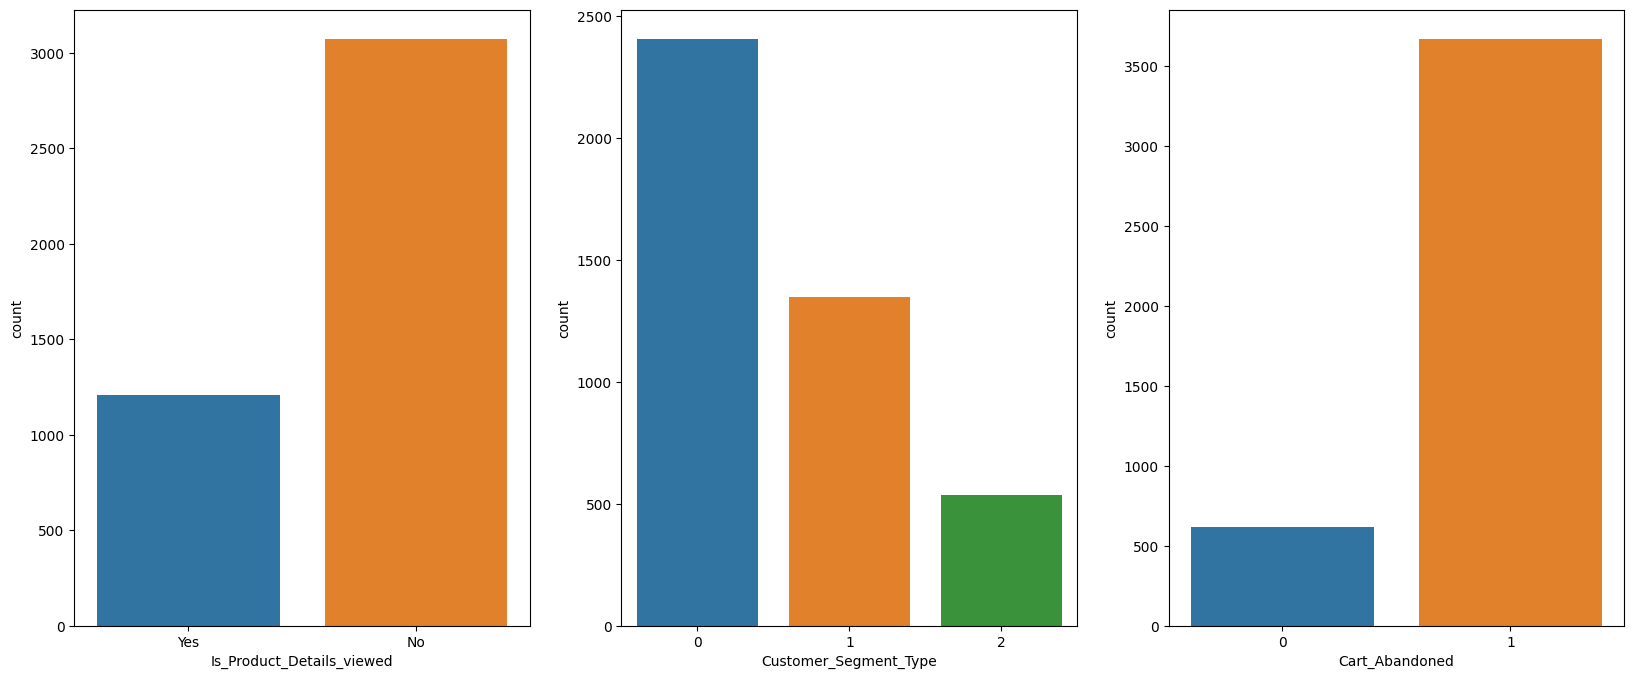

In [ ]:
f, ax = plt.subplots(nrows=1,ncols=3,figsize=(20, 8))
for i,j in zip(cat.columns.tolist(), ax.flatten()):
    sns.countplot(x=cat[i],ax=j)

**CORELATION PLOT OF INDEPENDENT ATTRIBUTES**

<Axes: >

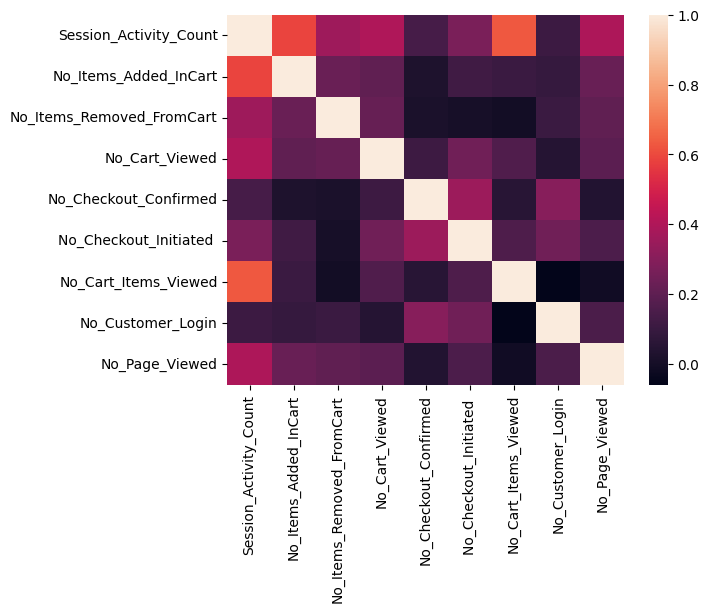

In [ ]:
corr = num.corr()
sns.heatmap(corr)

**DATA PREPARATION**

* FINDING NA VALUES FROM DATASET

In [ ]:
data = dataset.copy()
data.isna().sum()

ID                           0
Is_Product_Details_viewed    0
Session_Activity_Count       0
No_Items_Added_InCart        9
No_Items_Removed_FromCart    0
No_Cart_Viewed               9
No_Checkout_Confirmed        0
No_Checkout_Initiated        0
No_Cart_Items_Viewed         0
No_Customer_Login            0
No_Page_Viewed               0
Customer_Segment_Type        0
Cart_Abandoned               0
dtype: int64

In [ ]:
#COLUMNS WHICH HAVE NA VALUES
null_col = data.columns[data.isna().any()].tolist()
null_col

['No_Items_Added_InCart', 'No_Cart_Viewed']

* REPLACING NA VALUES WITH RESPECTIVE COLUMN MEAN

In [ ]:
data['No_Items_Added_InCart'] = data['No_Items_Added_InCart'].fillna(data['No_Items_Added_InCart'].mean())
data['No_Cart_Viewed'] = data['No_Cart_Viewed'].fillna(data['No_Cart_Viewed'].mean())

In [ ]:
data[null_col] = data[null_col].astype("int64")

In [ ]:
#CHECKING IF STILL ANY NA VALUES PRESENT
data.isna().sum()

ID                           0
Is_Product_Details_viewed    0
Session_Activity_Count       0
No_Items_Added_InCart        0
No_Items_Removed_FromCart    0
No_Cart_Viewed               0
No_Checkout_Confirmed        0
No_Checkout_Initiated        0
No_Cart_Items_Viewed         0
No_Customer_Login            0
No_Page_Viewed               0
Customer_Segment_Type        0
Cart_Abandoned               0
dtype: int64

1. TAKING CARE OF OUTLIERS USING MIN-MAX NORMALISATION

In [ ]:
num=data.select_dtypes(include=["int64"])
cat=data.select_dtypes(include=["object","category"]).drop(["ID"],axis=1)

In [ ]:
min_max_scaler = MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(num)
x_scaled

array([[0.00917431, 0.00444444, 0.        , ..., 0.00390625, 0.        ,
        0.        ],
       [0.08715596, 0.        , 0.        , ..., 0.0078125 , 0.        ,
        0.05714286],
       [0.01834862, 0.02222222, 0.        , ..., 0.00390625, 0.        ,
        0.        ],
       ...,
       [0.00917431, 0.00444444, 0.        , ..., 0.00390625, 0.        ,
        0.        ],
       [0.01834862, 0.01333333, 0.        , ..., 0.00390625, 0.        ,
        0.05714286],
       [0.07110092, 0.01777778, 0.        , ..., 0.02734375, 0.        ,
        0.02857143]])

In [ ]:
# pickle_out = open("scalar.pkl", "wb")
# pickle.dump(min_max_scaler, pickle_out)
# pickle_out.close()

In [ ]:
#NORMALISED DATA
df_scaled = pd.DataFrame(x_scaled,columns=num.columns)
df_scaled.head()

,Session_Activity_Count,No_Items_Added_InCart,No_Items_Removed_FromCart,No_Cart_Viewed,No_Checkout_Confirmed,No_Checkout_Initiated,No_Cart_Items_Viewed,No_Customer_Login,No_Page_Viewed
0,0.009174,0.004444,0.00,0.000000,0.000000,0.000000,0.003906,0.0,0.000000
1,0.087156,0.000000,0.00,0.058824,0.000000,0.000000,0.007812,0.0,0.057143
2,0.018349,0.022222,0.00,0.000000,0.090909,0.071429,0.003906,0.0,0.000000
3,0.013761,0.000000,0.00,0.058824,0.000000,0.000000,0.015625,0.0,0.000000
4,0.071101,0.062222,0.24,0.029412,0.000000,0.000000,0.015625,0.0,0.000000


array([[<Axes: title={'center': 'Session_Activity_Count'}>,
        <Axes: title={'center': 'No_Items_Added_InCart'}>,
        <Axes: title={'center': 'No_Items_Removed_FromCart'}>,
        <Axes: title={'center': 'No_Cart_Viewed'}>,
        <Axes: title={'center': 'No_Checkout_Confirmed'}>],
       [<Axes: title={'center': 'No_Checkout_Initiated '}>,
        <Axes: title={'center': 'No_Cart_Items_Viewed'}>,
        <Axes: title={'center': 'No_Customer_Login'}>,
        <Axes: title={'center': 'No_Page_Viewed'}>, <Axes: >]],
      dtype=object)

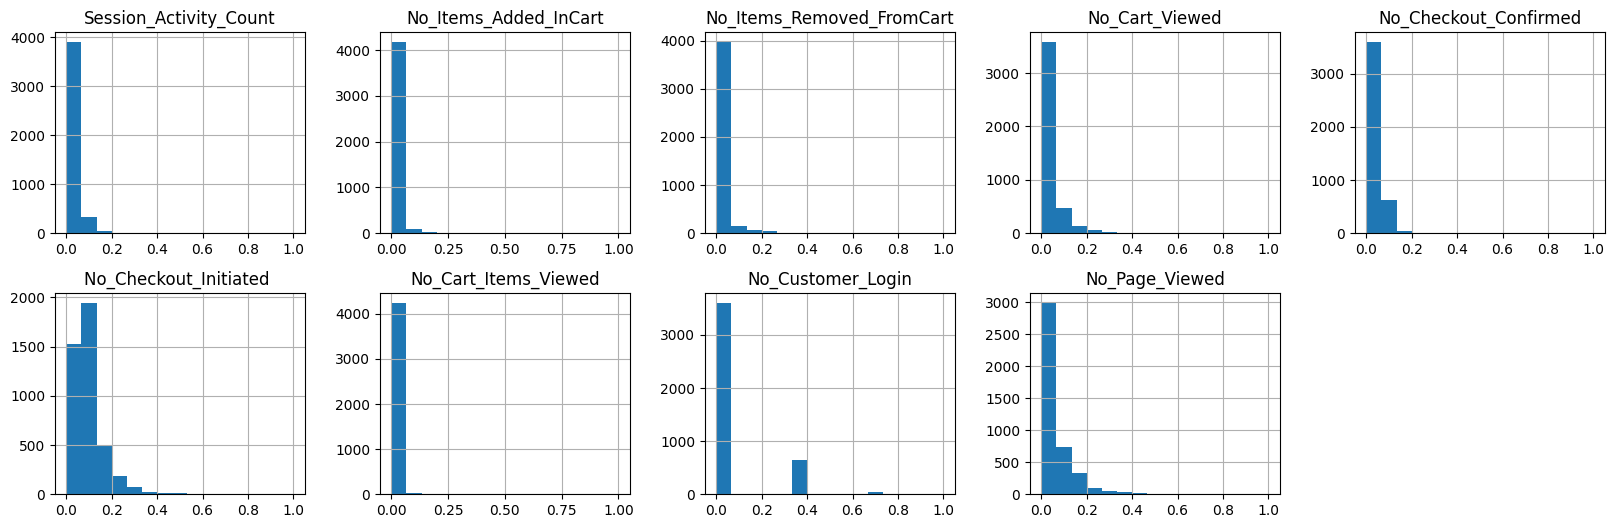

In [ ]:
#DATA VISUALIZATION FOR NORMALISED DATA
df_scaled.hist(bins=15, figsize=(20, 6), layout=(2, 5))

In [ ]:
df_scaled["ID"]=data.ID
df_scaled.set_index('ID',inplace=True)

In [ ]:
df_scaled.reset_index(inplace=True)

In [ ]:
df_final=df_scaled.join(cat)
df_final.head(3)

,ID,Session_Activity_Count,No_Items_Added_InCart,No_Items_Removed_FromCart,No_Cart_Viewed,No_Checkout_Confirmed,No_Checkout_Initiated,No_Cart_Items_Viewed,No_Customer_Login,No_Page_Viewed,Is_Product_Details_viewed,Customer_Segment_Type,Cart_Abandoned
0,Session_ID_0,0.009174,0.004444,0.0,0.000000,0.000000,0.000000,0.003906,0.0,0.000000,Yes,0,1
1,Session_ID_1,0.087156,0.000000,0.0,0.058824,0.000000,0.000000,0.007812,0.0,0.057143,No,0,1
2,Session_ID_2,0.018349,0.022222,0.0,0.000000,0.090909,0.071429,0.003906,0.0,0.000000,No,1,0


In [ ]:
df_final.Is_Product_Details_viewed.replace({"Yes":1,"No":0},inplace=True)
df_final.head(3)

,ID,Session_Activity_Count,No_Items_Added_InCart,No_Items_Removed_FromCart,No_Cart_Viewed,No_Checkout_Confirmed,No_Checkout_Initiated,No_Cart_Items_Viewed,No_Customer_Login,No_Page_Viewed,Is_Product_Details_viewed,Customer_Segment_Type,Cart_Abandoned
0,Session_ID_0,0.009174,0.004444,0.0,0.000000,0.000000,0.000000,0.003906,0.0,0.000000,1,0,1
1,Session_ID_1,0.087156,0.000000,0.0,0.058824,0.000000,0.000000,0.007812,0.0,0.057143,0,0,1
2,Session_ID_2,0.018349,0.022222,0.0,0.000000,0.090909,0.071429,0.003906,0.0,0.000000,0,1,0


In [ ]:
df_final.dtypes

ID                             object
Session_Activity_Count        float64
No_Items_Added_InCart         float64
No_Items_Removed_FromCart     float64
No_Cart_Viewed                float64
No_Checkout_Confirmed         float64
No_Checkout_Initiated         float64
No_Cart_Items_Viewed          float64
No_Customer_Login             float64
No_Page_Viewed                float64
Is_Product_Details_viewed       int64
Customer_Segment_Type        category
Cart_Abandoned               category
dtype: object

In [ ]:
df_final.Is_Product_Details_viewed=pd.Categorical(df_final.Is_Product_Details_viewed)